<a href="https://colab.research.google.com/github/Dexter0013/Operations-on-Databases/blob/main/csv_to_panda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir /content/drive/My\ Drive/data

In [ ]:
!pip install streamlit -q

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
[[('n03595614', 'jersey', np.float32(0.40058333)), ('n03485407', 'hand-held_computer', np.float32(0.016359832)), ('n03630383', 'lab_coat', np.float32(0.01356123)), ('n06359193', 'web_site', np.float32(0.010866697)), ('n03255030', 'dumbbell', np.float32(0.010865983))]]
Prediction results appended to data/prediction_results_imagepath.csv


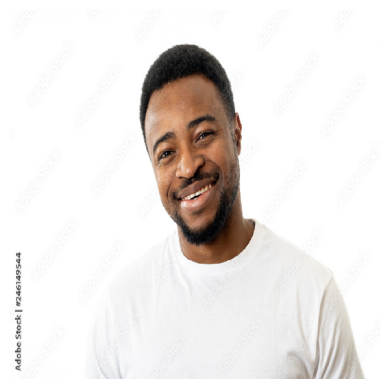

In [ ]:
f='/content/drive/MyDrive/data/human1.jpg'
import datetime
import os
import matplotlib.pyplot as plt
import csv
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions

model = EfficientNetB7(weights='imagenet')
img = image.load_img(f, target_size=(600, 600))  # EfficientNetB7 expects 600x600
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
predictions = model.predict(img_array)
results = decode_predictions(predictions)
plt.imshow(img)
plt.axis('off')
print(results)

def append_prediction_to_csv(filename, prediction_results, image_path):
    # Check if the directory exists, create if not
    if not os.path.exists('/content/drive/MyDrive/data'):
        os.makedirs('data')

    # Define the full path to the CSV file within the 'data' directory
    csv_filepath = os.path.join('/content/drive/MyDrive/data', filename)

    # Define the header if the file is new
    header = ['ImageNet ID', 'Label', 'Score', 'date', 'time', 'Image_Path']

    # Check if the file exists to decide if we need to write the header
    file_exists = os.path.exists(csv_filepath)

    with open(csv_filepath, mode='a', newline='') as file:
        writer = csv.writer(file)

        # Write the header only if the file did not exist before
        if not file_exists:
            writer.writerow(header)

        # Get the current date and time
        now = datetime.datetime.now()
        current_date = now.strftime("%Y-%m-%d")
        current_time = now.strftime("%H:%M:%S")

        # Write each prediction result
        if prediction_results and prediction_results[0] and prediction_results[0][0]:
            # Extract the first prediction (ImageNet ID, Label, Score)
            first_prediction_row = prediction_results[0][0]
            # Ensure the data is a list of the three elements
            writer.writerow([first_prediction_row[0], first_prediction_row[1], first_prediction_row[2], current_date, current_time, image_path])


append_prediction_to_csv('prediction_results_imgPath.csv', results, f)

print(f"Prediction results appended to data/prediction_results_imagepath.csv")

In [1]:
import pandas as pd
res=pd.read_csv('/content/drive/MyDrive/data/prediction_results_imgPath.csv')
res

,ImageNet ID,Label,Score,date,time,Image_Path
0,n03902125,pay-phone,0.512651,2025-07-05,19:53:17,/content/drive/MyDrive/data/bus stop.jpg
1,n04146614,school_bus,0.826016,2025-07-05,20:03:59,/content/drive/MyDrive/data/Schoolbus.jpg
2,n02113023,Pembroke,0.889250,2025-07-05,20:28:16,/content/drive/MyDrive/data/dog.jpg
3,n02930766,cab,0.391193,2025-07-05,20:29:35,/content/drive/MyDrive/data/cras.webp
4,n03595614,jersey,0.223669,2025-07-05,20:33:01,/content/drive/MyDrive/data/women_football.jpg
5,n04485082,tripod,0.089632,2025-07-05,20:34:45,/content/drive/MyDrive/data/human.jpg
6,n02666196,abacus,0.877780,2025-07-05,20:36:41,/content/drive/MyDrive/data/chess.webp
7,n03595614,jersey,0.400583,2025-07-05,20:39:32,/content/drive/MyDrive/data/human1.jpg


In [ ]:
!pip install ipython-sql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.8 MB/s eta 0:00:00


In [5]:
import pandas as pd
import sqlite3
res=pd.read_csv('/content/drive/MyDrive/data/prediction_results_imgPath.csv')
res
conn=sqlite3.connect('/content/drive/MyDrive/data/Prediction.db')

In [8]:
if res.to_sql("prediction_results", conn, if_exists="append", index=False):
  print("Data Inserted")
else:
  print("Table exists already")

Data Inserted


In [10]:
df_check = pd.read_sql_query("SELECT * FROM prediction_results", conn)
df_check

,ImageNet ID,Label,Score,date,time,Image_Path
0,n03902125,pay-phone,0.512651,2025-07-05,19:53:17,/content/drive/MyDrive/data/bus stop.jpg
1,n04146614,school_bus,0.826016,2025-07-05,20:03:59,/content/drive/MyDrive/data/Schoolbus.jpg
2,n02113023,Pembroke,0.889250,2025-07-05,20:28:16,/content/drive/MyDrive/data/dog.jpg
3,n02930766,cab,0.391193,2025-07-05,20:29:35,/content/drive/MyDrive/data/cras.webp
4,n03595614,jersey,0.223669,2025-07-05,20:33:01,/content/drive/MyDrive/data/women_football.jpg
5,n04485082,tripod,0.089632,2025-07-05,20:34:45,/content/drive/MyDrive/data/human.jpg
6,n02666196,abacus,0.877780,2025-07-05,20:36:41,/content/drive/MyDrive/data/chess.webp
7,n03595614,jersey,0.400583,2025-07-05,20:39:32,/content/drive/MyDrive/data/human1.jpg
8,n03902125,pay-phone,0.512651,2025-07-05,19:53:17,/content/drive/MyDrive/data/bus stop.jpg
9,n04146614,school_bus,0.826016,2025-07-05,20:03:59,/content/drive/MyDrive/data/Schoolbus.jpg


In [ ]:
conn=sqlite3.connect('/content/drive/MyDrive/data/result.db')
res.to_sql('Pre',conn)

8

In [12]:
c=conn.cursor()
c.execute('SELECT * FROM Prediction_results')
c.fetchall()

[('n03902125',
  'pay-phone',
  0.51265097,
  '2025-07-05',
  '19:53:17',
  '/content/drive/MyDrive/data/bus stop.jpg'),
 ('n04146614',
  'school_bus',
  0.826016,
  '2025-07-05',
  '20:03:59',
  '/content/drive/MyDrive/data/Schoolbus.jpg'),
 ('n02113023',
  'Pembroke',
  0.8892497,
  '2025-07-05',
  '20:28:16',
  '/content/drive/MyDrive/data/dog.jpg'),
 ('n02930766',
  'cab',
  0.3911933,
  '2025-07-05',
  '20:29:35',
  '/content/drive/MyDrive/data/cras.webp'),
 ('n03595614',
  'jersey',
  0.2236693,
  '2025-07-05',
  '20:33:01',
  '/content/drive/MyDrive/data/women_football.jpg'),
 ('n04485082',
  'tripod',
  0.08963161,
  '2025-07-05',
  '20:34:45',
  '/content/drive/MyDrive/data/human.jpg'),
 ('n02666196',
  'abacus',
  0.87777996,
  '2025-07-05',
  '20:36:41',
  '/content/drive/MyDrive/data/chess.webp'),
 ('n03595614',
  'jersey',
  0.40058333,
  '2025-07-05',
  '20:39:32',
  '/content/drive/MyDrive/data/human1.jpg'),
 ('n03902125',
  'pay-phone',
  0.51265097,
  '2025-07-05',
  '

0          /content/drive/MyDrive/data/bus stop.jpg
1         /content/drive/MyDrive/data/Schoolbus.jpg
2               /content/drive/MyDrive/data/dog.jpg
3             /content/drive/MyDrive/data/cras.webp
4    /content/drive/MyDrive/data/women_football.jpg
5             /content/drive/MyDrive/data/human.jpg
6            /content/drive/MyDrive/data/chess.webp
7            /content/drive/MyDrive/data/human1.jpg
Name: Image_Path, dtype: object


(np.float64(-0.5), np.float64(999.5), np.float64(697.5), np.float64(-0.5))

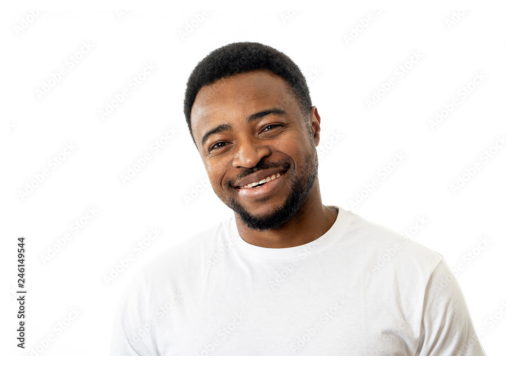

In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

res=pd.read_csv('/content/drive/MyDrive/data/prediction_results_imgPath.csv')
# Access the 'Image_Path' column using square brackets
image_paths = res['Image_Path']
# ind=res[index]
# You can now iterate through image_paths or use them as needed
print(image_paths)

# for i in ind:
#   print(image_paths[i])
img=image.load_img(image_paths[7])
plt.imshow(img)
plt.axis('off')

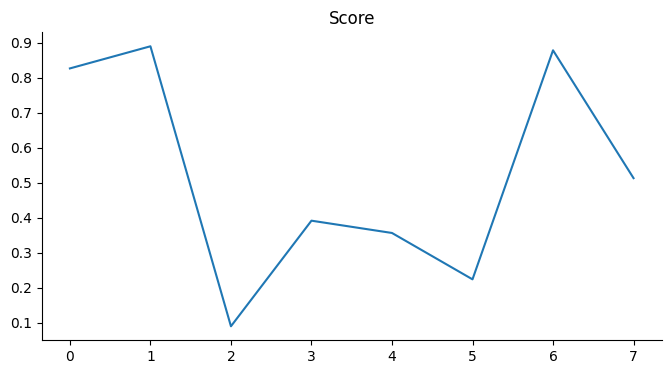

In [ ]:
from matplotlib import pyplot as plt
res['Score'].plot(kind='line', figsize=(8, 4), title='Score')
plt.gca().spines[['top', 'right']].set_visible(False)

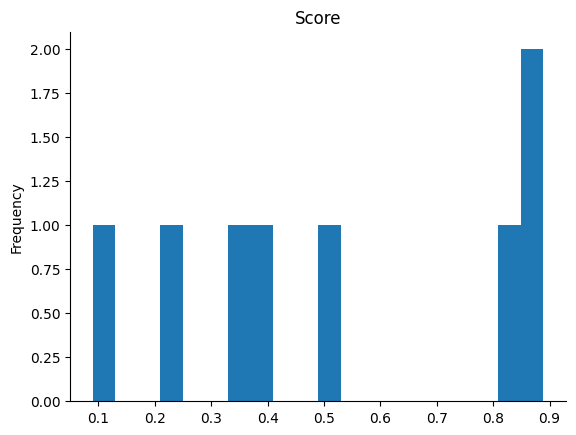

In [ ]:
from matplotlib import pyplot as plt
res['Score'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import pandas as pd
# res=pd.DataFrame(results)
# res.head()
print(results)
label=results[0][0][1]
predi=results[0][0][2].item()*100
res_df=pd.DataFrame([[label,predi]], columns=['labels','predi'])
res_df
while True:
             # results = model.predict(frame)
              if results and results[0]:
                  label = results[0][0][1]
                  predi = results[0][0][2].item() * 100

                  # Create a new row DataFrame
                  new_row = pd.DataFrame([[label, predi]], columns=['labels', 'predi'])

                  # Concatenate the new row to the main results_df
                  results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df

NameError: name 'results' is not defined

In [14]:
res

,ImageNet ID,Label,Score,date,time,Image_Path
0,n03902125,pay-phone,0.512651,2025-07-05,19:53:17,/content/drive/MyDrive/data/bus stop.jpg
1,n04146614,school_bus,0.826016,2025-07-05,20:03:59,/content/drive/MyDrive/data/Schoolbus.jpg
2,n02113023,Pembroke,0.889250,2025-07-05,20:28:16,/content/drive/MyDrive/data/dog.jpg
3,n02930766,cab,0.391193,2025-07-05,20:29:35,/content/drive/MyDrive/data/cras.webp
4,n03595614,jersey,0.223669,2025-07-05,20:33:01,/content/drive/MyDrive/data/women_football.jpg
5,n04485082,tripod,0.089632,2025-07-05,20:34:45,/content/drive/MyDrive/data/human.jpg
6,n02666196,abacus,0.877780,2025-07-05,20:36:41,/content/drive/MyDrive/data/chess.webp
7,n03595614,jersey,0.400583,2025-07-05,20:39:32,/content/drive/MyDrive/data/human1.jpg


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.142.239.35


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.142.239.35:8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏your url is: https://quick-toys-tickle.loca.lt
  Stopping...
^C


In [ ]:
%%writefile app.py
import streamlit as st
st.title("Demo")


Overwriting app.py


In [ ]:
%%sql
SELECT * FROM P

 * sqlite:///result.db
(sqlite3.OperationalError) no such table: P
[SQL: SELECT * FROM P]
(Background on this error at: https://sqlalche.me/e/20/e3q8)
